<a href="https://colab.research.google.com/github/FaridRash/IGNIS/blob/main/SNR_calculator_MODTRAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

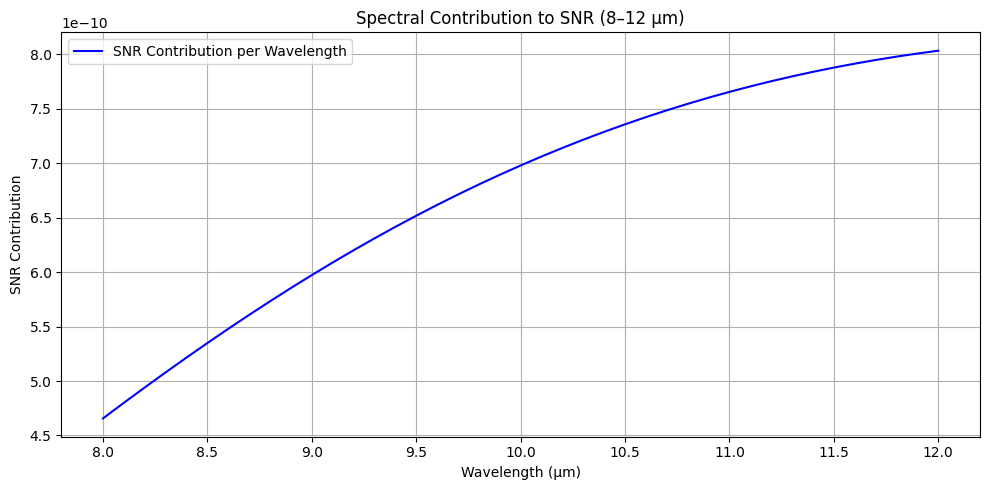

Total SNR over 8–12 μm: 1.54e+10


In [115]:
import numpy as np
import matplotlib.pyplot as plt

# === Constants from physics ===
c1 = 3.7418e8      # First radiation constant [W·μm^4/m^2]
c2 = 1.4388e4      # Second radiation constant [μm·K]
h = 6.626e-34      # Planck's constant [J·s]
c = 3e8            # Speed of light [m/s]

# === User/system parameters ===
T = 278.15         # Target temperature in Kelvin
epsilon = 0.95     # Emissivity of volcanic surface
tau_a = 0.85       # Atmospheric transmittance (assumed constant)
tau_0 = 0.89       # Optical system transmittance (assumed constant)
eta = 0.7          # Quantum efficiency (assumed constant)
t = 0.01           # Integration time [s]
theta = 0          # Observation angle [degrees]
cos_theta = np.cos(np.deg2rad(theta))
A0 = 1.9434e9      # Target area [m²]
R = 460000         # Distance to target [m]
focal_length = 72.8  # mm
F_number = 1.05
D = (focal_length / F_number) / 1000  # Aperture diameter in meters

# === Wavelength range ===
lambda_range = np.arange(8, 12.1, 0.1)  # μm
delta_lambda = 0.1  # μm

# === Calculate spectral radiant exitance M_lambda(T) for each λ ===
M_lambda = c1 / (lambda_range**5 * (np.exp(c2 / (lambda_range * T)) - 1))

# === Calculate emitted flux from target ===
E_lambda = epsilon * M_lambda  # W/m²·μm

# === Multiply for summation integrand ===
S_lambda = lambda_range * E_lambda * tau_a * tau_0 * eta * delta_lambda

# === Summation ===
S_sum = np.sum(S_lambda)

# === Final signal photoelectrons ===
S_total = (D**2 * t * cos_theta * A0) / (4 * R**2 * h * c) * S_sum

# === Noise and SNR ===
N_total = np.sqrt(S_total)          # Assume B = D = 0
SNR_total = S_total / N_total       # Final SNR

# === Plotting contribution per wavelength ===
SNR_lambda = S_lambda / N_total

plt.figure(figsize=(10, 5))
plt.plot(lambda_range, SNR_lambda, label='SNR Contribution per Wavelength', color='blue')
plt.xlabel('Wavelength (μm)')
plt.ylabel('SNR Contribution')
plt.title('Spectral Contribution to SNR (8–12 μm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Print final SNR ===
print(f"Total SNR over 8–12 μm: {SNR_total:.2e}")
